# ETL y EDA del data set de musica de spotify

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
path_music = "data/data_spotify.csv"

music = pd.read_csv(path_music)

In [164]:
music.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [165]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

In [166]:
music.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,2.314062e+05,1977.223231,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,0.094058,116.948017,0.532095,0.708556,5.200519,31.556610,0.084863
std,1.213219e+05,25.593168,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,0.149937,30.726937,0.262408,0.454429,3.515257,21.582614,0.278679
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.778000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629600e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


In [167]:
music

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [169]:
music_data = music[[ 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit']]

In [170]:
# Matriz de correlación
correlation_matrix = music_data.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                      year  acousticness  danceability    energy  \
year              1.000000     -0.624550      0.203430  0.532419   
acousticness     -0.624550      1.000000     -0.265950 -0.750283   
danceability      0.203430     -0.265950      1.000000  0.220569   
energy            0.532419     -0.750283      0.220569  1.000000   
instrumentalness -0.291571      0.335821     -0.281429 -0.287692   
liveness         -0.055839     -0.023871     -0.105532  0.126293   
loudness          0.490118     -0.567072      0.294170  0.782982   
speechiness      -0.120937     -0.056077      0.225305 -0.045226   
tempo             0.137892     -0.204982     -0.004872  0.249936   
valence          -0.029304     -0.185540      0.560242  0.350086   
mode             -0.033084      0.046475     -0.045306 -0.038355   
key               0.012503     -0.021686      0.022599  0.029984   
popularity        0.880724     -0.593345      0.221077  0.497488   
explicit          0.245227     -0.253690      0.

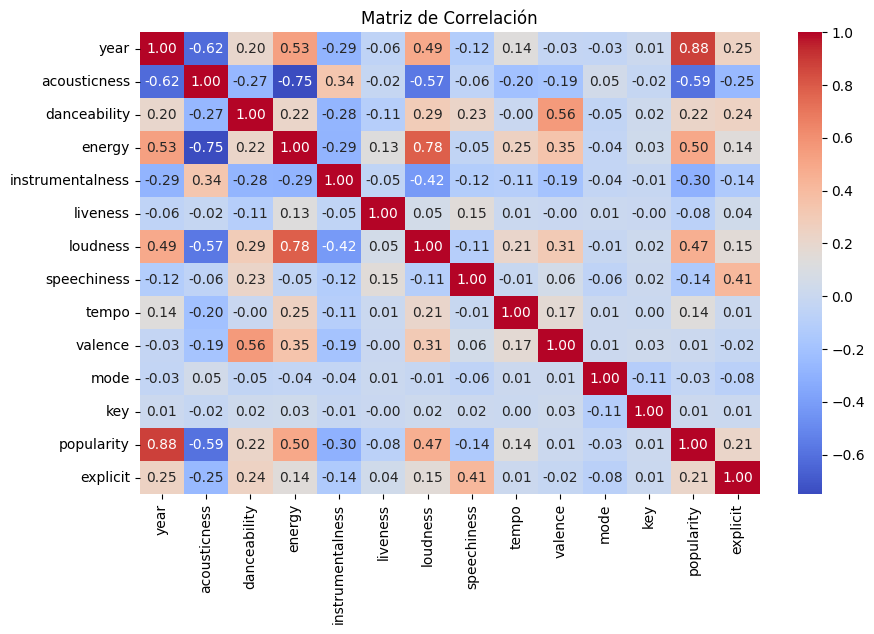

In [171]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [172]:
music_0 = music[['duration_ms']]

music_1 = music[['explicit']]
       
music_2 = music[['danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']]
       
music_3 = music[[ 'tempo','key', 'popularity','loudness']]

music_0_1 = music[['acousticness','valence', 'mode']]

music_4 = music[['year']]

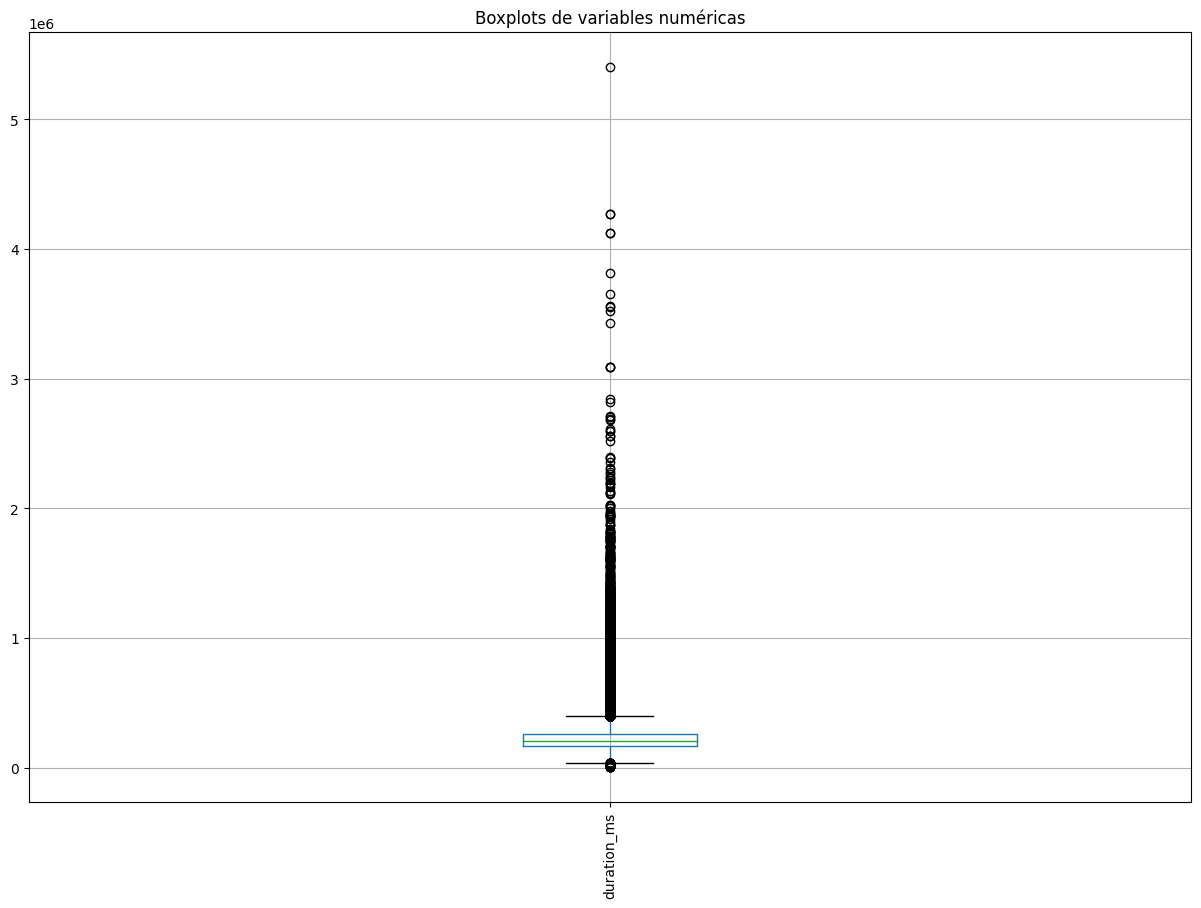

In [173]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_0.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

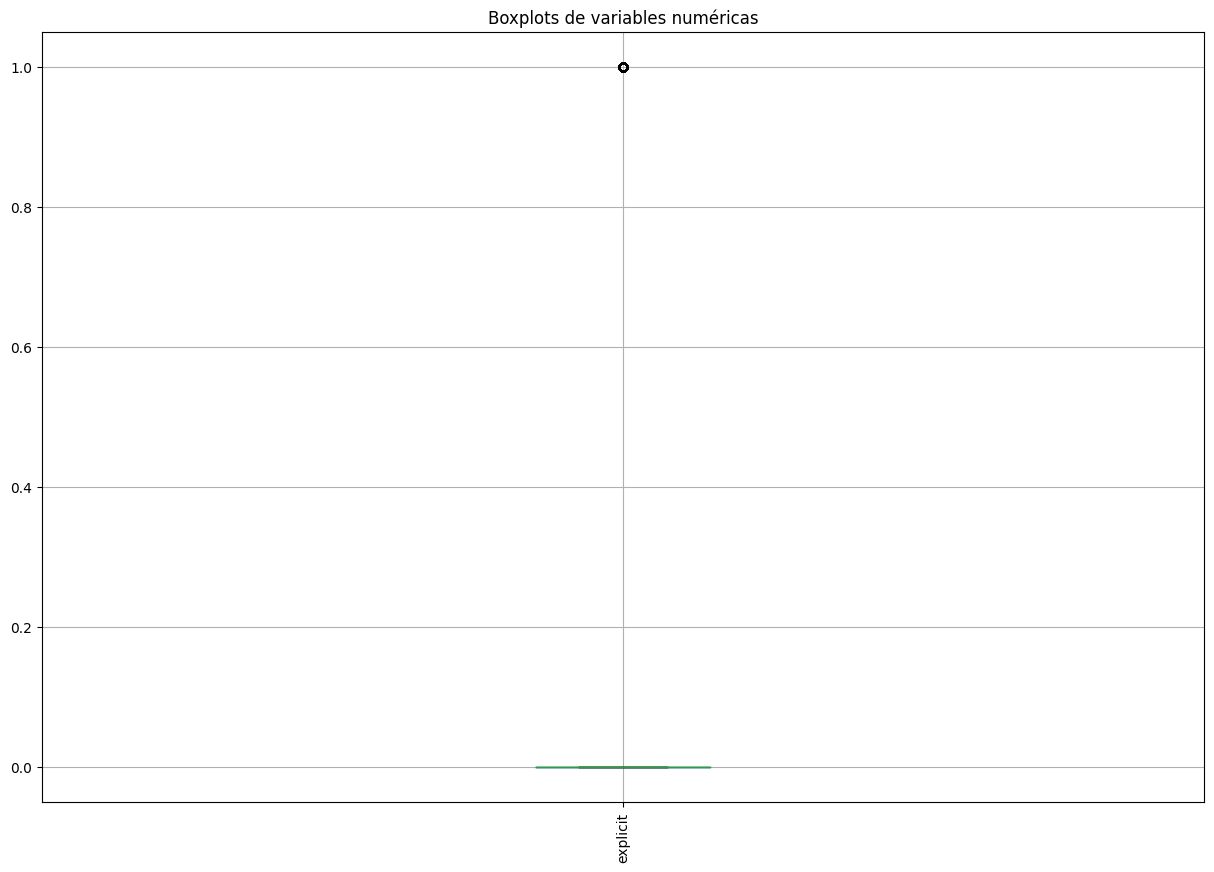

In [174]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_1.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()


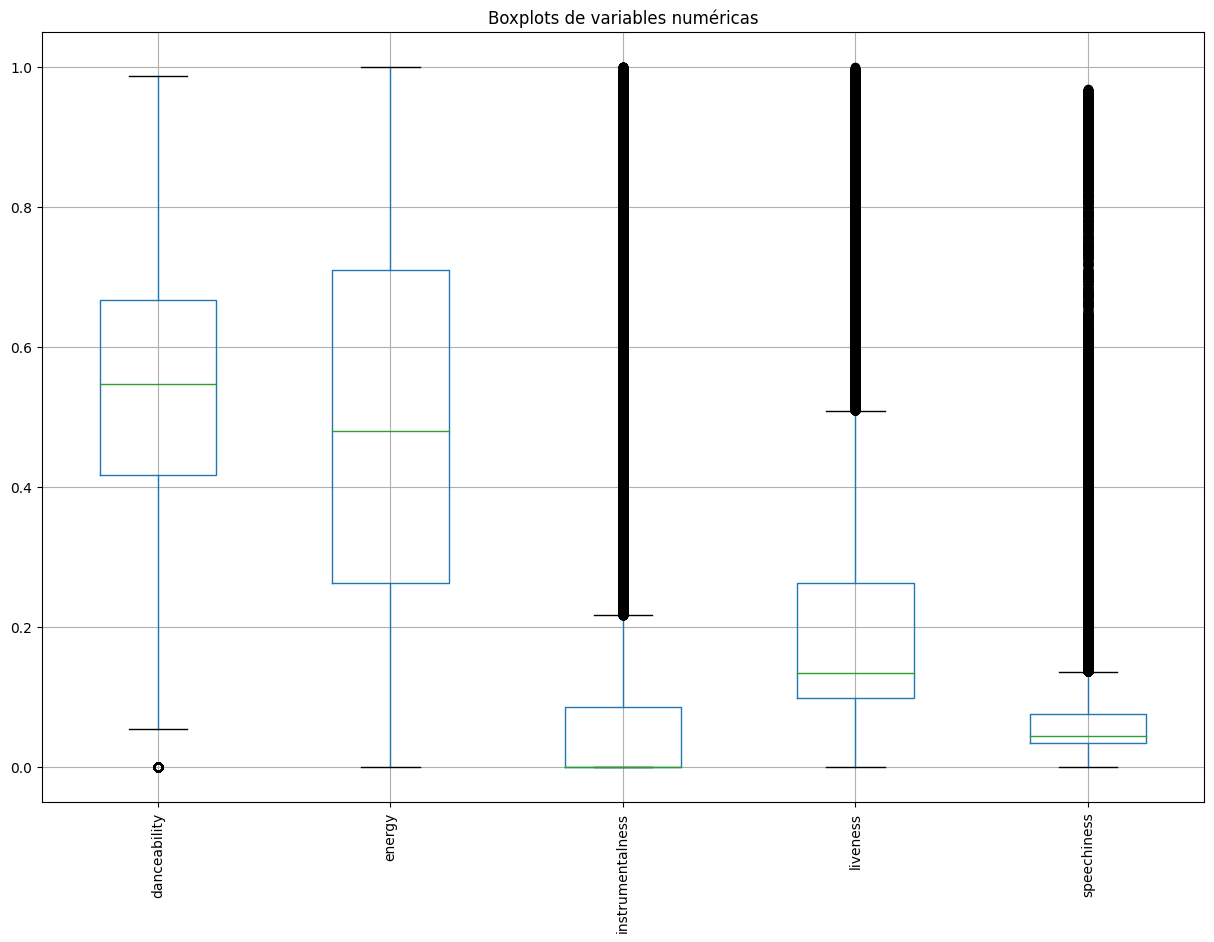

In [175]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_2.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

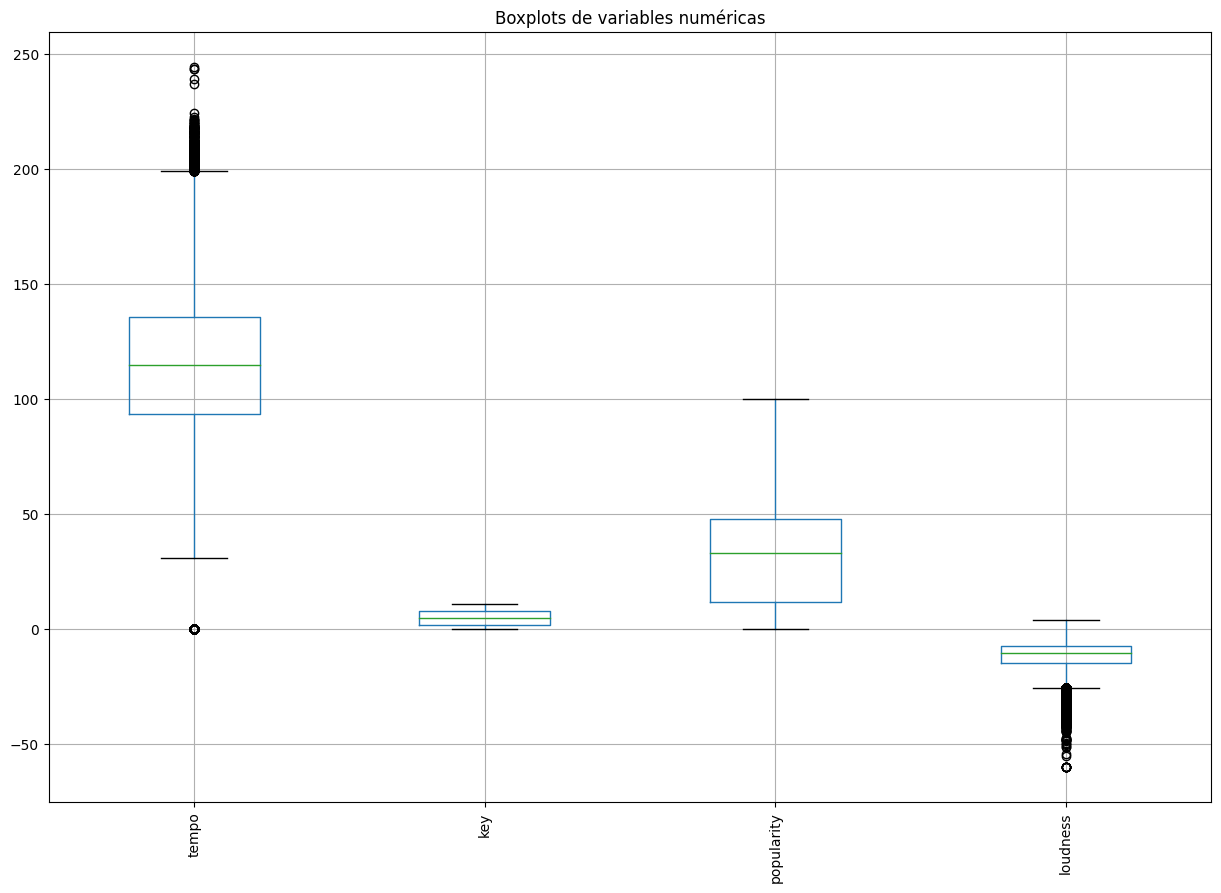

In [176]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_3.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

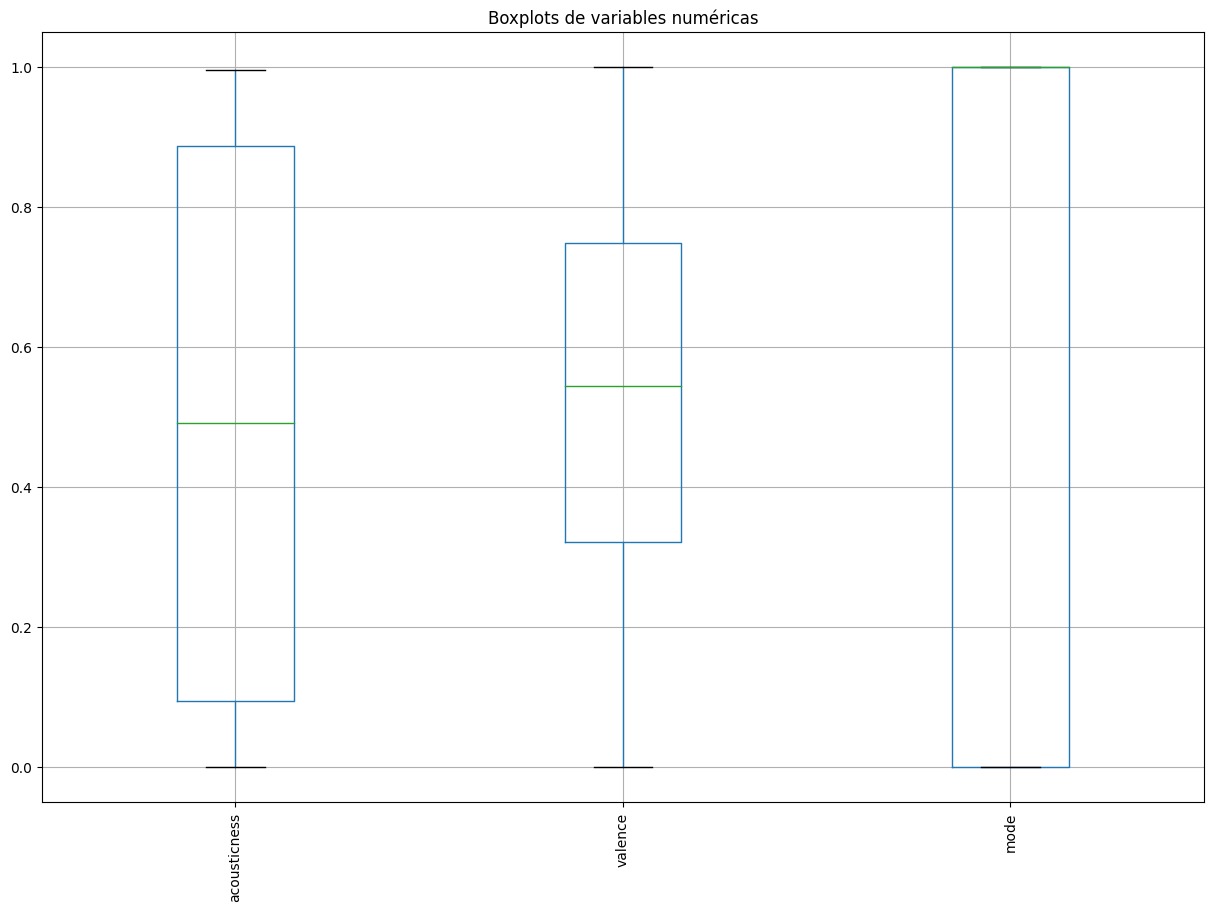

In [177]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_0_1.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

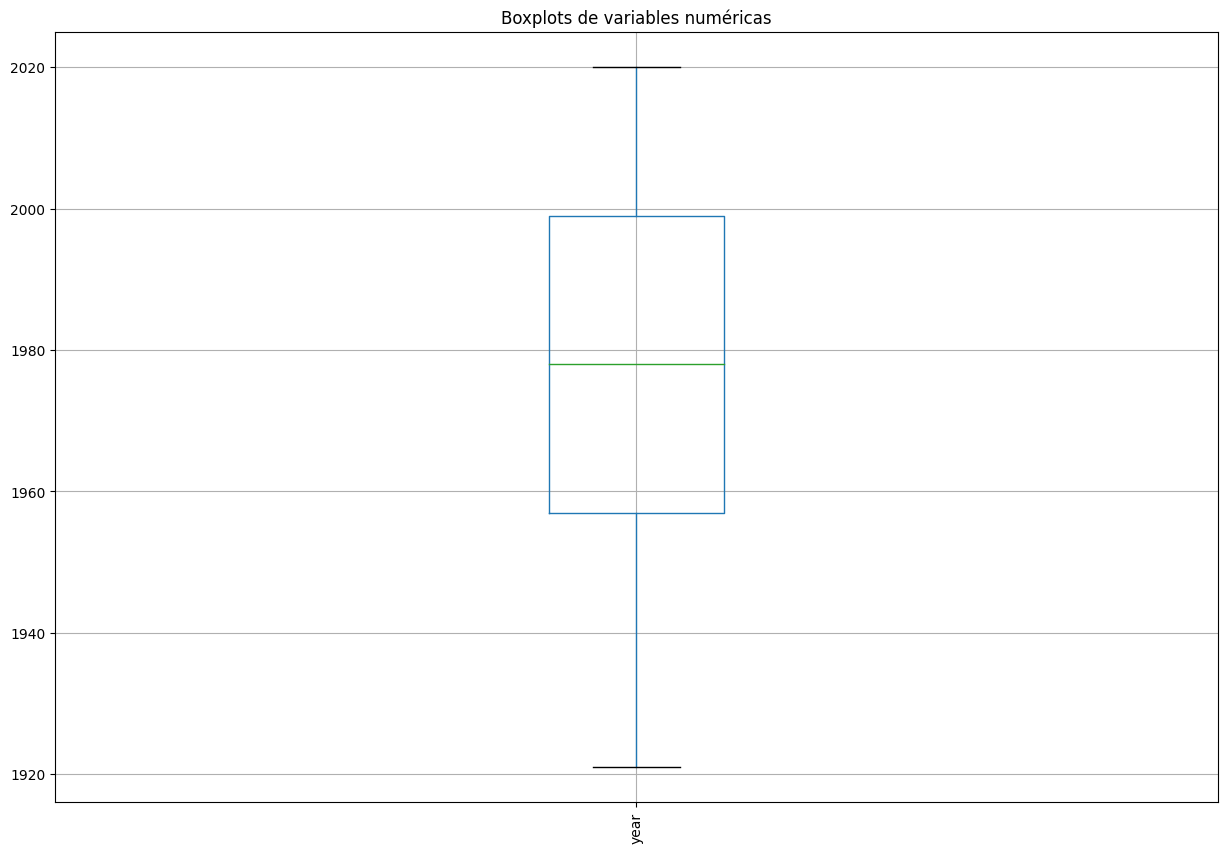

In [178]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
music_4.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit']

In [179]:
['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit']

['id',
 'name',
 'artists',
 'duration_ms',
 'release_date',
 'year',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'mode',
 'key',
 'popularity',
 'explicit']

In [180]:
#Columna "Duration_ms"
duration = music[['duration_ms']]

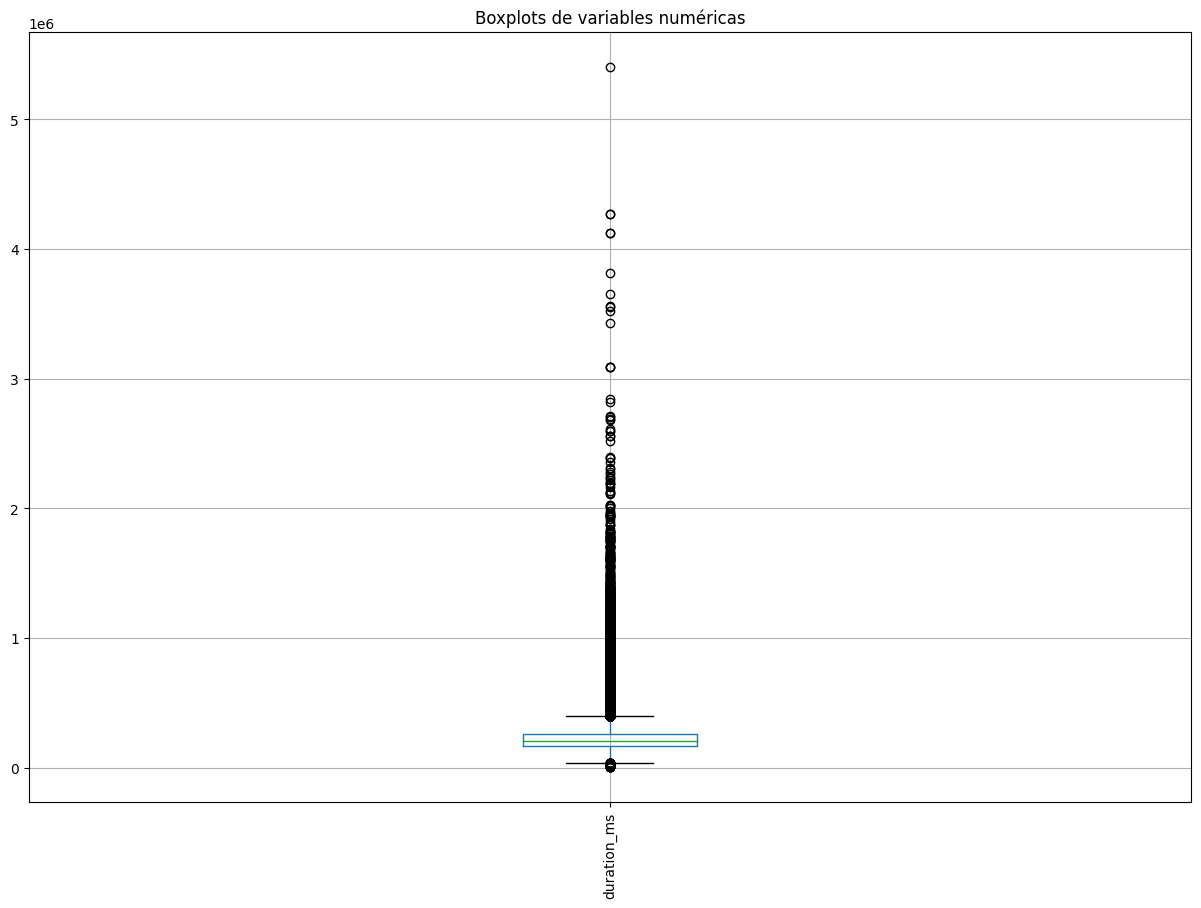

In [181]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
duration.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots de variables numéricas')
plt.show()

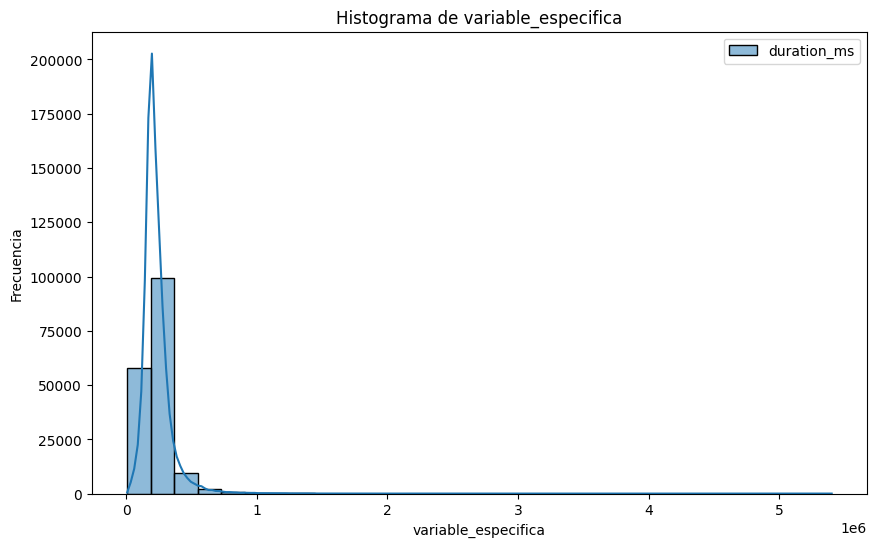

In [182]:
# Histograma para una variable específica
plt.figure(figsize=(10, 6))
sns.histplot(duration, bins=30, kde=True)
plt.title('Histograma de variable_especifica')
plt.xlabel('variable_especifica')
plt.ylabel('Frecuencia')
plt.show()


In [183]:
# Calcular el IQR para cada columna numérica
Q1 = duration.quantile(0.25)
Q3 = duration.quantile(0.75)
IQR = Q3 - Q1

# Mostrar filas con outliers
outliers = ((duration < (Q1 - 1.5 * IQR)) | (duration > (Q3 + 1.5 * IQR))).any(axis=1)
print(duration[outliers])


        duration_ms
4            687733
10           590293
27           505920
49           491333
54           519933
...             ...
169358       489361
169398       417693
169509       412632
169686       405914
169842       414820

[9483 rows x 1 columns]


In [184]:
from scipy import stats

# Calcular el Z-score para cada valor en el DataFrame
z_scores = np.abs(stats.zscore(duration.select_dtypes(include=np.number)))
outliers = (z_scores > 3)

# Mostrar filas con outliers
print(duration[(outliers).any(axis=1)])


        duration_ms
4            687733
83           785427
214          754480
217         1170280
308         1038400
...             ...
167908       602227
168192       614200
168263       768640
168416       680920
169088       644273

[2319 rows x 1 columns]


In [185]:
filtro_tiempo = music["duration_ms"] >= 720000 #mayor a 12 min

temas_largos = music[filtro_tiempo]

filtro_tiempo_menor = music['duration_ms'] < 720000 #menor a 12 min

music = music[filtro_tiempo_menor]

In [186]:
temas_largos

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
83,71FaVeFy9ZOiQRY4yOijey,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",785427,1928,1928,0.992,0.301,0.0823,0.852,0.0870,-23.282,0.0382,137.296,0.0548,1,1,0,0
214,4kitSA29V9ZlJN0QKNplKt,"Brahms: Symphony No. 4 in E Minor, Op. 98: I. ...","['Johannes Brahms', 'Karl Böhm', 'Staatskapell...",754480,1935,1935,0.918,0.210,0.1740,0.903,0.3510,-12.639,0.0347,80.950,0.1180,0,4,0,0
217,4lP0LpspRC1El9FOGp03iz,Bruckner: Symphony No. 5 in B-Flat Major: I. I...,"['Anton Bruckner', 'Karl Böhm', 'Staatskapelle...",1170280,1935,1935,0.779,0.158,0.1190,0.749,0.1180,-15.162,0.0347,56.985,0.0884,0,5,0,0
308,4dyXvYZcD49SLZ7zzpDBMV,"Symphony No. 9 in D Minor, Op. 125 ""Ode to Joy...","['Ludwig van Beethoven', 'Tilla Briem', 'Elisa...",1038400,1936,1936,0.934,0.234,0.4080,0.686,0.1170,-9.846,0.0368,135.379,0.1030,1,10,0,0
309,4nGeicn6SM1AjvXbra6PzV,"Symphony No. 3 in E-Flat Major, Op. 55 ""Eroica...","['Ludwig van Beethoven', 'Philharmonia Orchest...",981093,1936,1936,0.978,0.133,0.0648,0.864,0.1060,-19.207,0.0391,77.093,0.0370,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167501,08b1bCjsKjMzhjBm0qhkof,LONG SEASON,['Fishmans'],2116040,10/25/96,1996,0.550,0.476,0.8020,0.835,0.2870,-9.021,0.0514,91.483,0.2280,0,4,43,0
167567,0YzMEu5sGNX0JKr9mdBtzd,The Dead Flag Blues,['Godspeed You! Black Emperor'],987960,8/14/97,1997,0.743,0.243,0.1920,0.777,0.0997,-18.237,0.0388,104.202,0.0360,0,10,44,0
167843,5UbN3fe9OB1p5KwjgUAHD4,"Beethoven: Symphony No. 6 in F Major, Op. 68 ""...","['Ludwig van Beethoven', 'Philadelphia Orchest...",758267,6/23/00,2000,0.955,0.247,0.0383,0.714,0.1080,-22.760,0.0363,108.252,0.1360,1,5,49,0
167854,1HfJV18PHF2UQqh4TuySBJ,Storm,['Godspeed You! Black Emperor'],1352413,1/1/00,2000,0.210,0.102,0.6140,0.714,0.0996,-9.433,0.0649,182.349,0.0379,1,3,46,0


                      year  acousticness  danceability    energy  \
year              1.000000     -0.529495      0.054005  0.418791   
acousticness     -0.529495      1.000000     -0.263980 -0.743558   
danceability      0.054005     -0.263980      1.000000  0.364993   
energy            0.418791     -0.743558      0.364993  1.000000   
instrumentalness -0.162004      0.371292     -0.559247 -0.402354   
liveness          0.082006     -0.248729      0.113060  0.394132   
loudness          0.183618     -0.522889      0.320815  0.749201   
speechiness      -0.135765      0.070501      0.565239  0.012509   
tempo             0.165016     -0.267466      0.225233  0.297726   
valence           0.172703     -0.455441      0.774639  0.564868   
mode             -0.102104      0.116562     -0.051489 -0.074541   
key               0.008822     -0.032317      0.078250  0.068067   
popularity        0.876141     -0.556565      0.066356  0.424133   
explicit          0.229642     -0.143439      0.

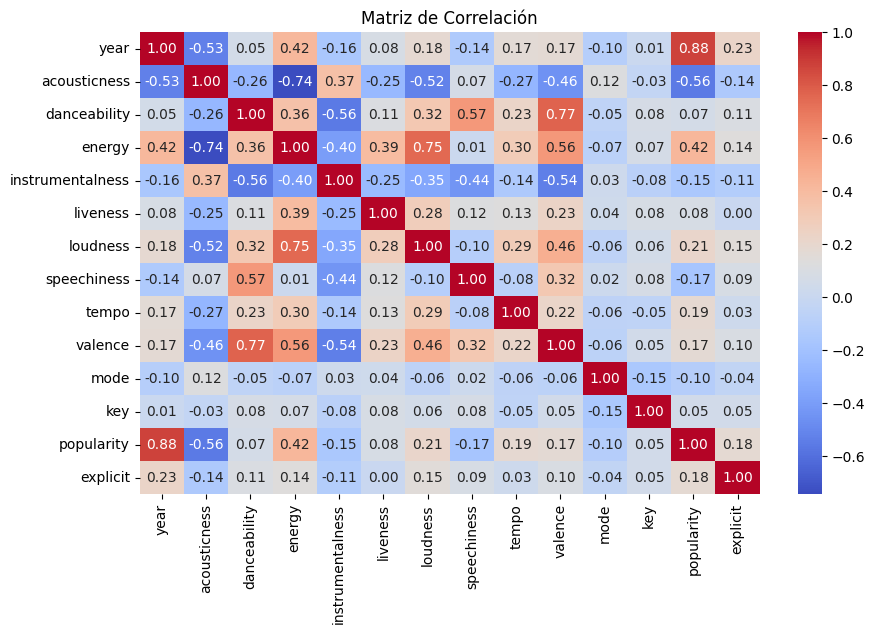

In [187]:
data_temaslargos = temas_largos[[ 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit']]

# Matriz de correlación
cm_temas_largos = data_temaslargos.corr()

# Mostrar la matriz de correlación
print(cm_temas_largos)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_temas_largos, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Columnas a mirar: Explicit, danceability, tempo

In [188]:
music.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [189]:
explicit = music['explicit']

En el contexto de los datos de Spotify, el término "explicit" se refiere a si una canción contiene lenguaje explícito o contenido que puede no ser adecuado para todas las audiencias. Esto incluye palabras fuertes, blasfemias, o temas que pueden ser considerados inapropiados para niños o personas sensibles.

Los temas cerca de 1 son temas con contendio explicito!

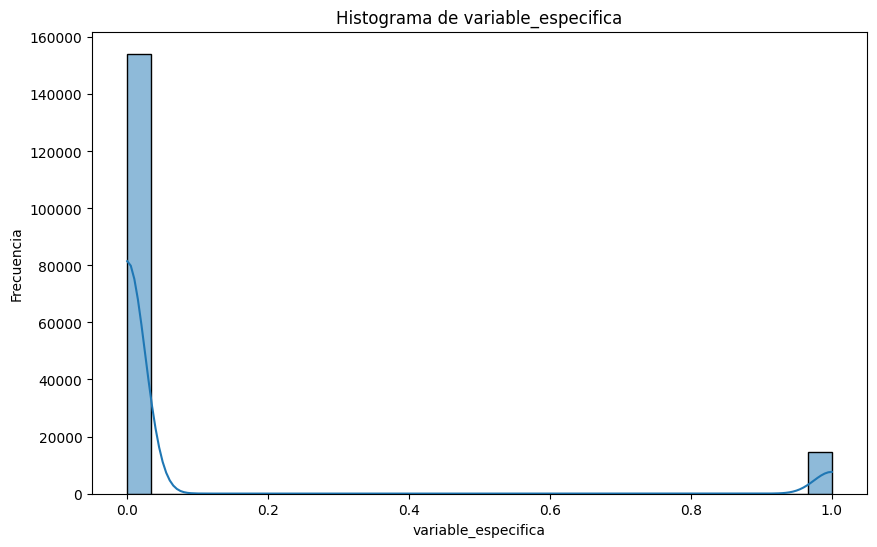

In [190]:
# Histograma para una variable específica
plt.figure(figsize=(10, 6))
sns.histplot(explicit, bins=30, kde=True)
plt.title('Histograma de variable_especifica')
plt.xlabel('variable_especifica')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='danceability', ylabel='Count'>

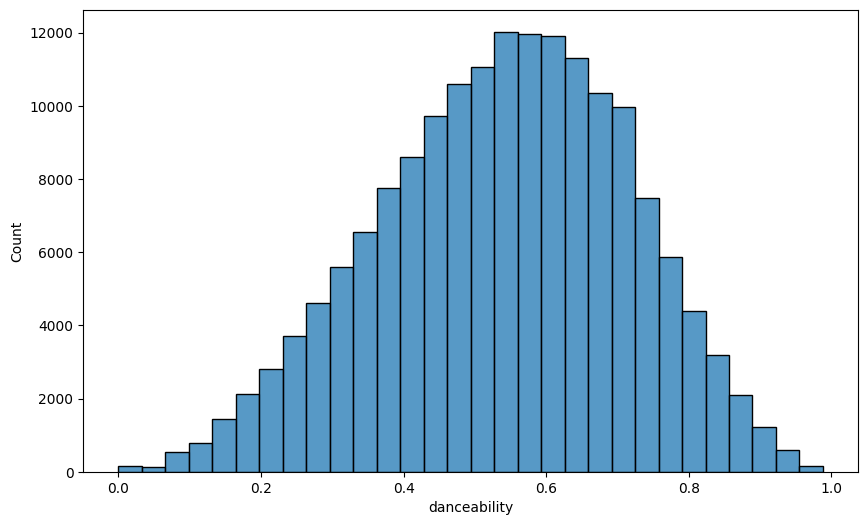

In [191]:
danceability = music['danceability']

plt.figure(figsize=(10, 6))
sns.histplot(danceability, bins=30)

<Axes: xlabel='tempo', ylabel='Count'>

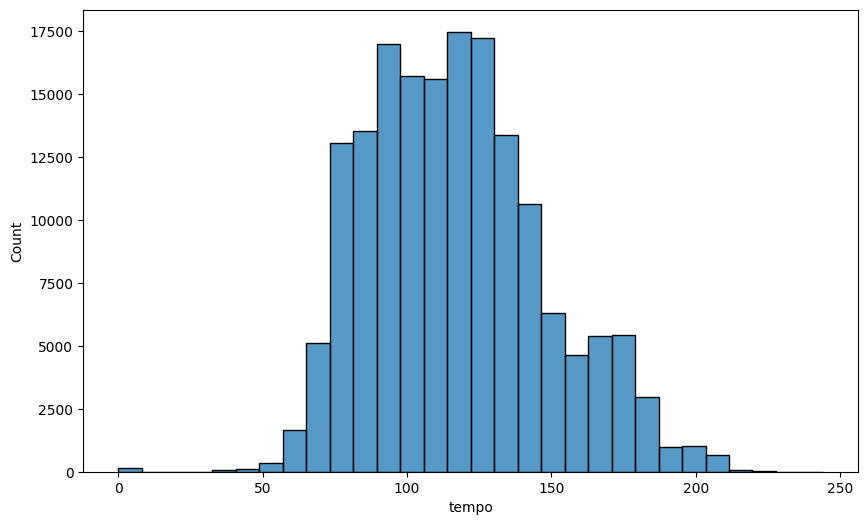

In [192]:
tempo = music['tempo']

plt.figure(figsize=(10, 6))
sns.histplot(tempo, bins=30)

No hay mas detalles de Outliers

In [193]:
nulos = music.isnull().sum()

print(nulos)

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64


No hay nulos!

In [194]:
music

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [198]:
music_exp = music.copy()

In [199]:
import ast

# Convertir la columna "artists" en formato de lista de manera segura
music_exp['artists'] = music_exp['artists'].apply(ast.literal_eval)

# Expandir la lista de artistas en cada fila
music_expanded = music_exp.explode('artists')


In [200]:
music_expanded

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,Carl Woitschach,158648,1928,1928,0.9950,0.708,0.1950,0.56300,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",Robert Schumann,282133,1928,1928,0.9940,0.379,0.0135,0.90100,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",Vladimir Horowitz,282133,1928,1928,0.9940,0.379,0.0135,0.90100,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,Seweryn Goszczyński,104300,1928,1928,0.6040,0.749,0.2200,0.00000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),Francisco Canaro,180760,9/25/28,1928,0.9950,0.781,0.1300,0.88700,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,Kygo,180700,5/29/20,2020,0.5380,0.514,0.5390,0.00233,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,Oh Wonder,180700,5/29/20,2020,0.5380,0.514,0.5390,0.00233,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,Cash Cash,167308,2/28/20,2020,0.0714,0.646,0.7610,0.00000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,Andy Grammer,167308,2/28/20,2020,0.0714,0.646,0.7610,0.00000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [ ]:
music_expanded.to_csv("music.csv", index=False)